## Traemos los datos

In [1]:
import pandas as pd
import datetime
from dateutil.parser import parse

In [2]:
df = pd.read_csv("chatwspfranco.csv")

In [3]:
df.head()

,Fecha,Emisor,Mensaje
0,23/2/19 11:03,Racana,Hermano
1,23/2/19 11:03,Racana,Fuiste en la mañanas?
2,23/2/19 11:03,Racana,Quieres ir en la tarde?
3,23/2/19 11:09,Franco Parraguirre,Iba a ir tipo 4
4,23/2/19 11:09,Franco Parraguirre,Jajajaja


## Limpieza del texto

1. Ponemos todos los mensajes en minusculas
2. Reemplazamos todos los tildes por su caracter sin acentuación
3. Removemos todos los caracteres especiales
4. El último paso es remover todos los stopwords

In [4]:
#Pasamos las fechas a formato date, y los mensajes en minusculas
df['Fecha'] = df['Fecha'].apply(lambda x: parse(x, dayfirst=True))
df['Mensaje'] = df['Mensaje'].apply(lambda x: x.lower())

In [5]:
from unicodedata import normalize
import string

In [6]:
#sacado de https://es.stackoverflow.com/questions/135707/c%C3%B3mo-puedo-reemplazar-las-letras-con-tildes-por-las-mismas-sin-tilde-pero-no-l
trans_tab = dict.fromkeys(map(ord, u'\u0301\u0308'), None)

In [7]:
print(df['Mensaje'][35])
normalize('NFKC', normalize('NFKD', df['Mensaje'][35]).translate(trans_tab))

 estas seguro que matt está preparado


' estas seguro que matt esta preparado'

In [8]:
df['mensajes_limpios'] = df.Mensaje.apply(lambda x: normalize('NFKC', normalize('NFKD', x).translate(trans_tab)))

In [9]:
#eliminamos todo lo que no sea del alfabeto (números, emojis, caracteres especiales)
import re
def nontext(text: string):
    return re.sub(r'([^a-z\sñ])+', '', text)

In [10]:
df['mensajes_limpios'] = df.mensajes_limpios.apply(nontext)

In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('spanish')

In [12]:
df['mensajes_limpios'] = df['mensajes_limpios'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [13]:
df.head()

,Fecha,Emisor,Mensaje,mensajes_limpios
0,2019-02-23 11:03:00,Racana,hermano,hermano
1,2019-02-23 11:03:00,Racana,fuiste en la mañanas?,mañanas
2,2019-02-23 11:03:00,Racana,quieres ir en la tarde?,quieres ir tarde
3,2019-02-23 11:09:00,Franco Parraguirre,iba a ir tipo 4,iba ir tipo
4,2019-02-23 11:09:00,Franco Parraguirre,jajajaja,jajajaja


## Bag of words
Bag of words en diccionario que contiene para cada palabra, la cantidad de veces que aparece en el texto

In [14]:
import collections

In [15]:
bagofwords = collections.Counter([y for x in df['mensajes_limpios'].values.flatten() for y in x.split()])

## Graficamos

Para esto utilizamos la libreria wordcloud (instalación pip install wordcloud)

In [16]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [17]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, 
                      height = 2000, 
                      random_state=1, 
                      background_color='salmon', 
                      colormap='Pastel1', 
                      collocations=False, 
                      stopwords = STOPWORDS,
                      font_path = r'C:\Users\pablo.racana\Desktop\Roboto-Regular.ttf'
                     ).generate_from_frequencies(bagofwords)

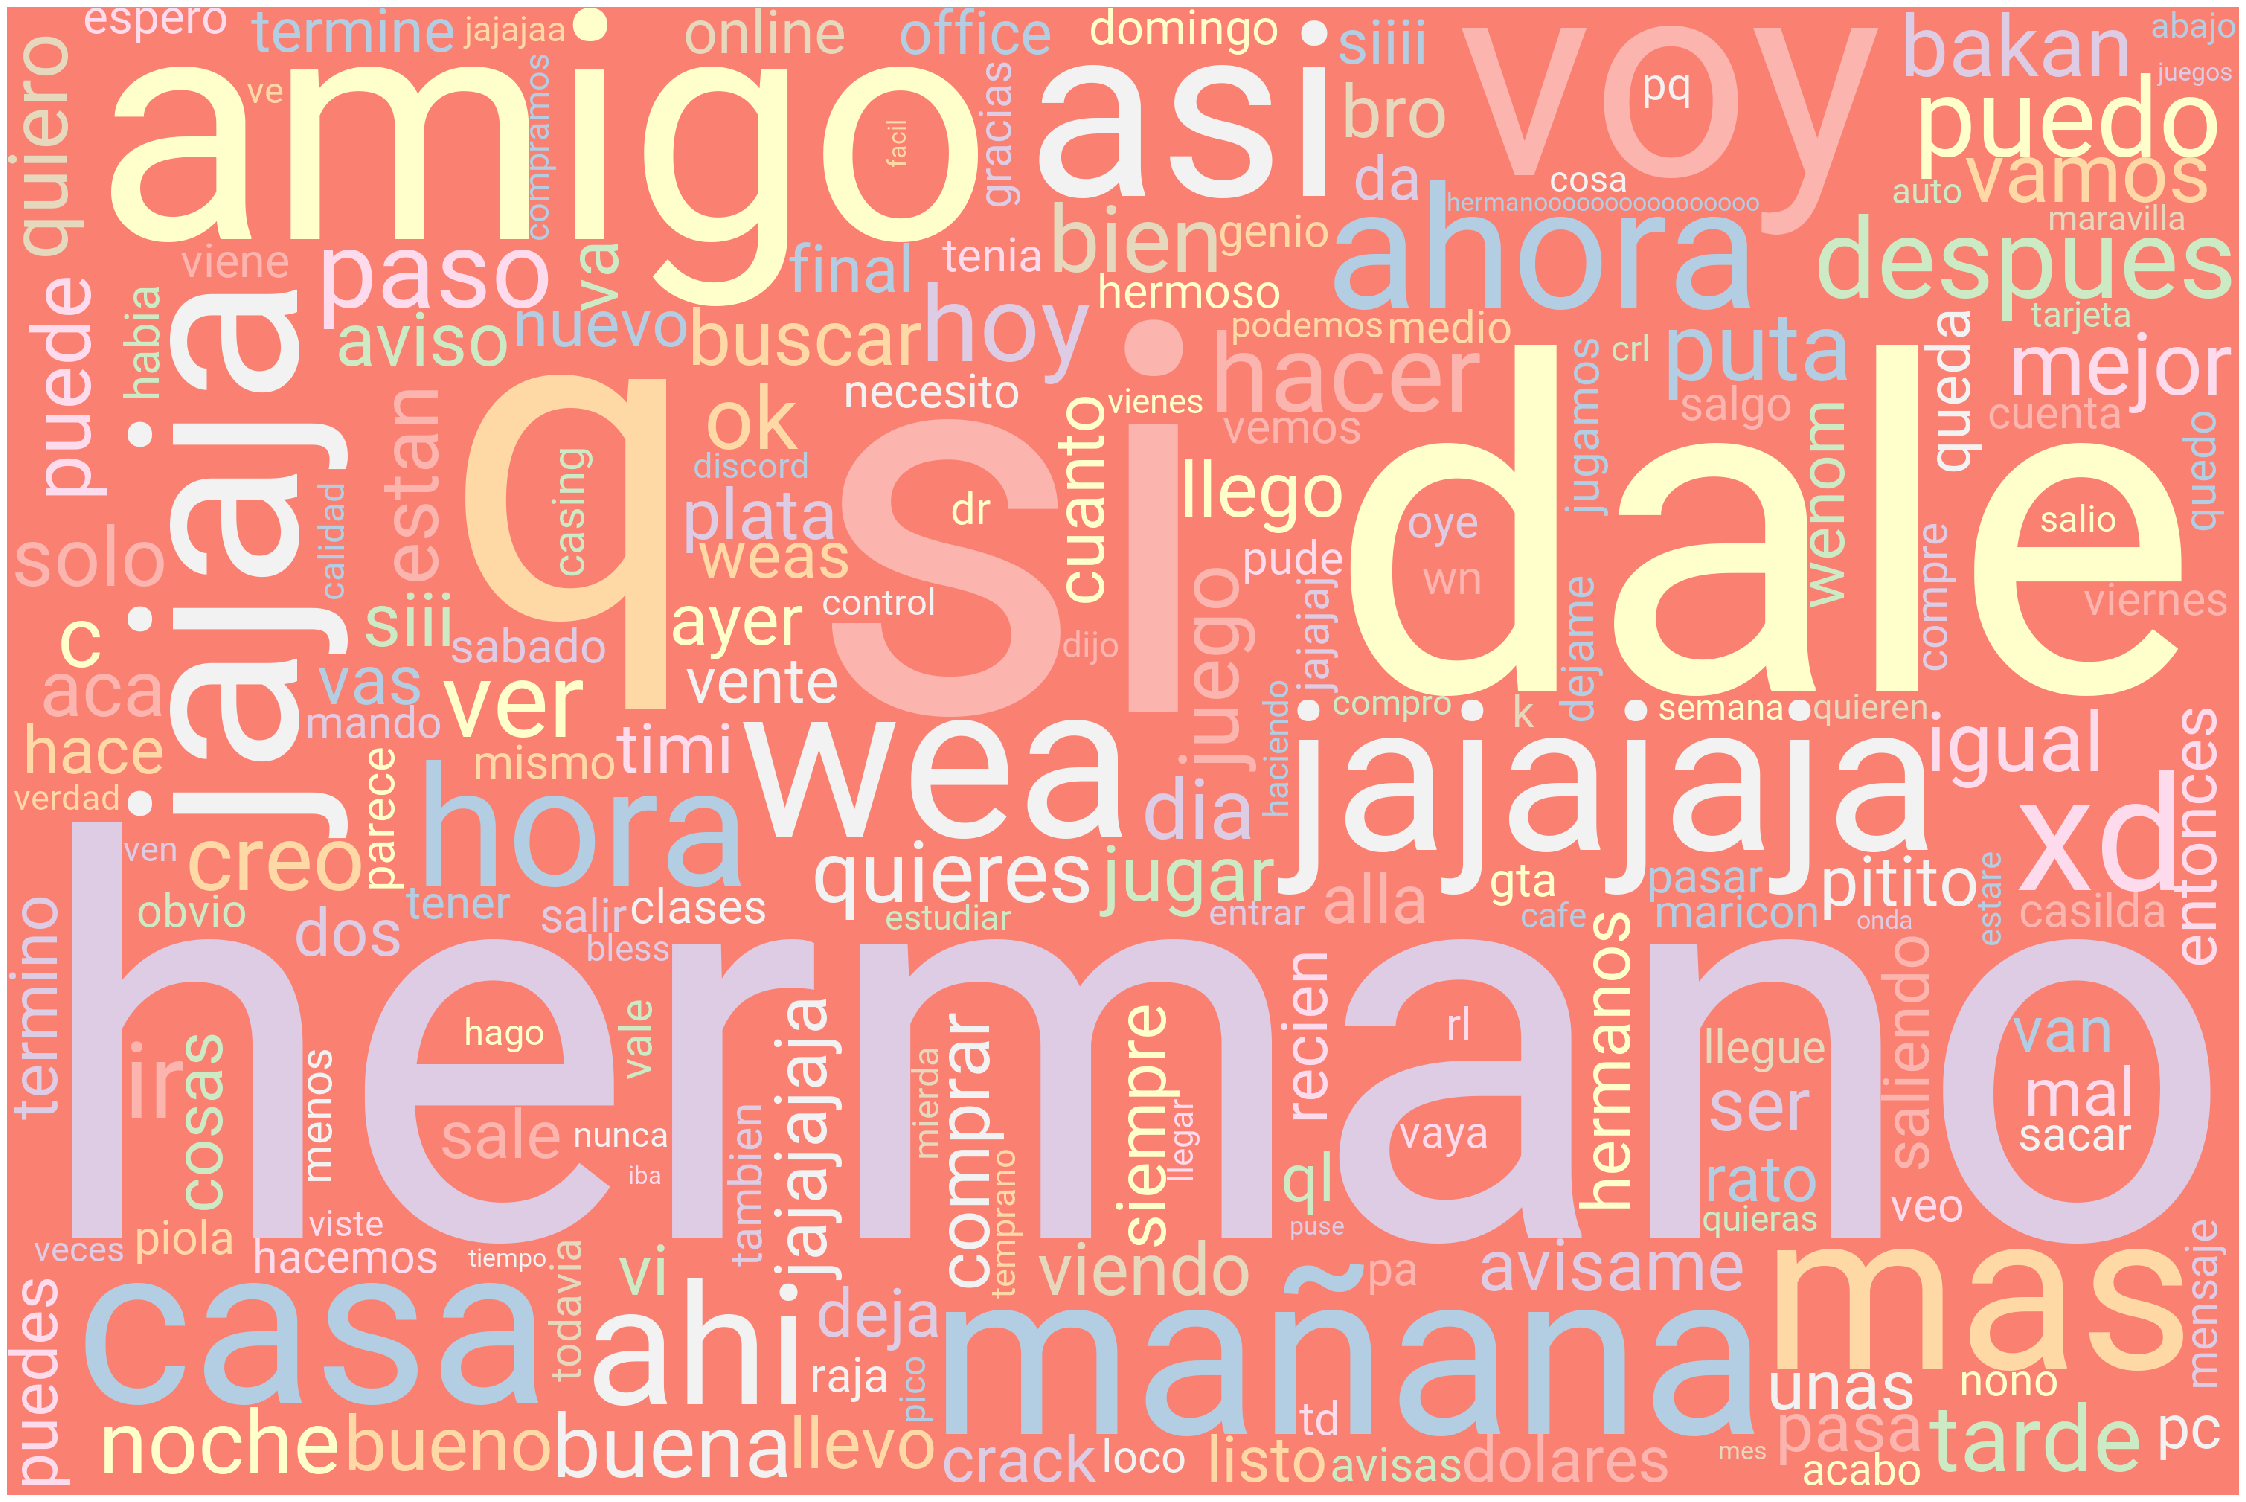

In [18]:
plot_cloud(wordcloud)